In [1]:
# Import the libraries

%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 10

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
crimes_df = pd.read_csv("crime_data_edited.csv")

crimes_df = crimes_df.sample(frac=0.15)

y = crimes_df["Crime Code"]
crimes_df.drop("Crime Code", axis=1, inplace=True)

crimes_df

,Time Occurred,Victim Age,Day Occurred,Days To Report,Day of Year,Time of Day,Location Lat,Location Lng
31885,2300,44.0,Wednesday,1,348,NIGHT,34.0067,-118.3515
180873,2215,0.0,Wednesday,1,33,NIGHT,34.2179,-118.4317
172289,2200,61.0,Thursday,1,118,NIGHT,33.9493,-118.2652
23060,1800,25.0,Sunday,1,114,DAY,34.0309,-118.2974
19819,1530,42.0,Friday,0,21,DAY,34.0216,-118.3556
...,...,...,...,...,...,...,...,...
163158,1200,0.0,Thursday,46,90,DAY,34.2373,-118.5623
201970,659,0.0,Friday,0,84,DAY,34.2234,-118.5932
139634,258,0.0,Tuesday,0,326,NIGHT,33.9471,-118.3758
92639,1551,9.0,Tuesday,0,291,DAY,34.2012,-118.4815


In [3]:
def k_plot(X, y, kseries, cross_val_func, title):
    
    result = kseries.apply(
        cross_val_func(X, y)
    )
    
    print("Minimum error of {0:.3f} at k={1}".format(result.min(), result.idxmin()))
    
    ax = result.plot(
        kind="line", title=title,
        figsize=(10,6), color="red"
    )
    
    ax.set_xlabel("k")
    ax.set_ylabel("MAE")
    
    return ax

## K Nearest Neighbors

In [4]:
import warnings
warnings.filterwarnings("ignore")

def get_cross_val_error(X, y):
    
    def cross_val_error(k=30):
        
        vec = DictVectorizer(sparse=False)
        scaler = StandardScaler()
        model = KNeighborsRegressor(n_neighbors=k, metric="manhattan")
        
        pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
        
        return np.mean(
            -cross_val_score(pipeline, X.to_dict(orient="records"), y, 
                             cv=4, scoring="neg_mean_absolute_error"))
   
    return cross_val_error

In [5]:
krange = range(1, 101, 4)
kseries = pd.Series(
    index=krange,
    data=krange
)

Minimum error of 177.399 at k=97


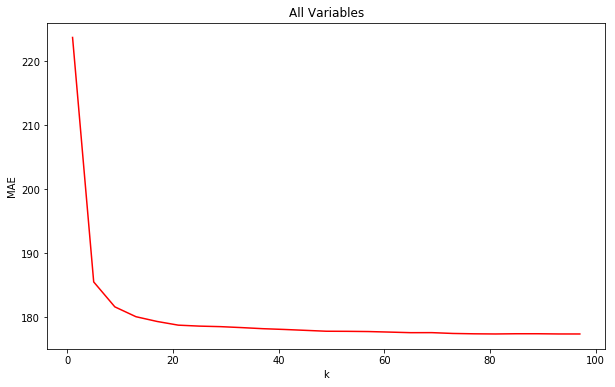

In [6]:
ax = k_plot(crimes_df, y, kseries, get_cross_val_error, "All Variables")
ax.get_figure().savefig("kNN_plot.jpeg")

Minimum error of 175.813 at k=93


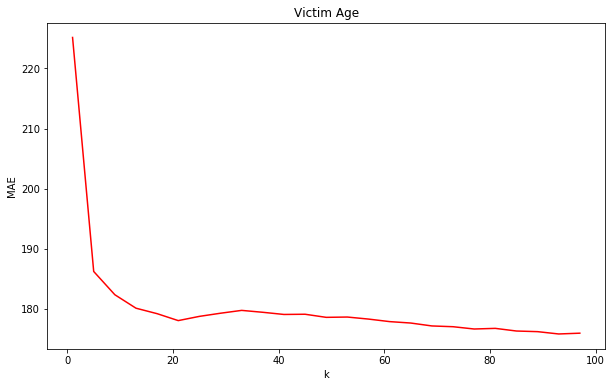

In [7]:
k_plot(crimes_df[["Victim Age"]], y, kseries, get_cross_val_error, "Victim Age");

Minimum error of 177.159 at k=97


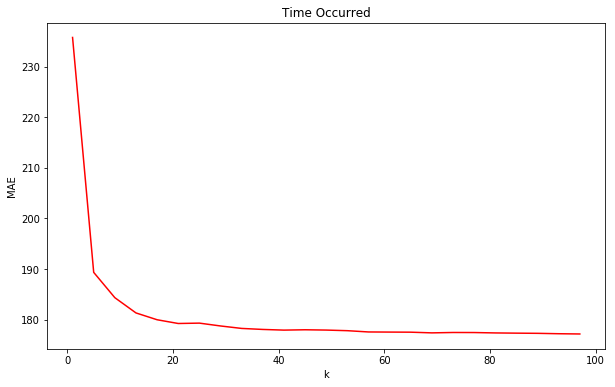

In [8]:
k_plot(crimes_df[["Time Occurred"]], y, kseries, get_cross_val_error, "Time Occurred");

Minimum error of 176.840 at k=69


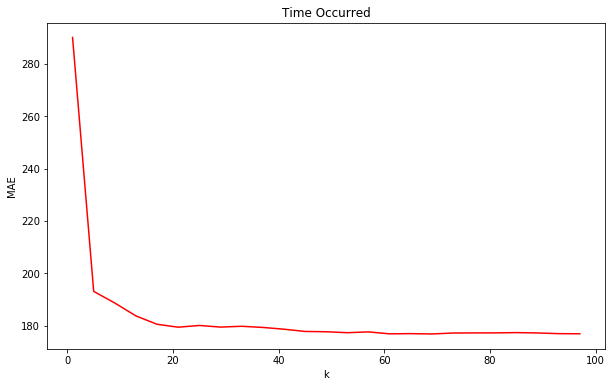

In [9]:
k_plot(crimes_df[["Days To Report"]], y, kseries, get_cross_val_error, "Time Occurred");

Minimum error of 176.514 at k=81


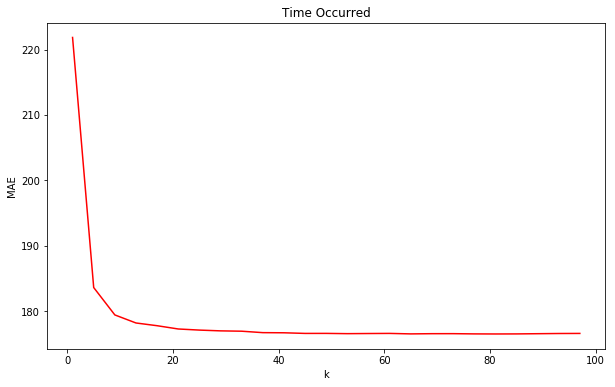

In [10]:
k_plot(crimes_df[["Location Lat", "Location Lng"]], y, kseries, get_cross_val_error, "Time Occurred");

The results of the k nearest neighbors model reflects the lack of coherence we saw when visualizing the data. The mean absolute error when using all features is ~177. The city of LA scores crime severity from about 100 to 1000. Thus, an error of 170 suggests these features are not strong perdicts of crime severity. Furthermore, none of the individual features were strong indicators with mean absolute errors also close to 170.

## Random Forest Model

In [11]:
def get_cross_val_error_rf(X, y):
    
    def cross_val_error_rf(k=30):
        
        vec = DictVectorizer(sparse=False)
        scaler = StandardScaler()
        model = RandomForestRegressor(n_estimators=k)
        
        pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
        
        return np.mean(
            -cross_val_score(pipeline, X.to_dict(orient="records"), y, 
                             cv=4, scoring="neg_mean_absolute_error"))
   
    return cross_val_error_rf

In [12]:
est_range = range(1, 101, 6)

est_series = pd.Series(
    index=est_range,
    data=est_range
)

Minimum error of 172.403 at k=97


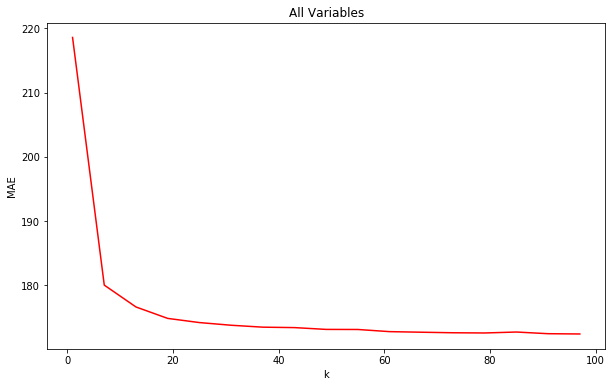

In [13]:
ax = k_plot(crimes_df, y, est_series, get_cross_val_error_rf, "All Variables")
ax.get_figure().savefig("rf_plot.jpeg")